<a href="https://colab.research.google.com/github/AbhiMan1601/Models-Statistics-and-Predictions/blob/main/Wigner's_Spherical_Law_Root_Finding_and_Rejection_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SIMULATING FROM WIGNER'S SPHERICAL LAW**


Given distributions with parameter $R>0$ and $x \in [-R,R]$

$$F(x) = \frac{1}{4R^3} (2R-x) (R+x)^2$$
$$f(x) = \frac{3}{4R^3} (R^2-x^2)$$

# **Q1. ROOT FINDING**
The goal is to compare and contrast three methods for simulating from this distribution.
1. Direct computation of the root
2. The Newton-Raphson Algorithm
3. The Bisection Algorithm



In [99]:
# assigning distributions by taking R = 10
def F(x):
  return (1/4000)*(20-x)*(10+x)**2

def f(x):
  return (3/4000)*(100-x**2)

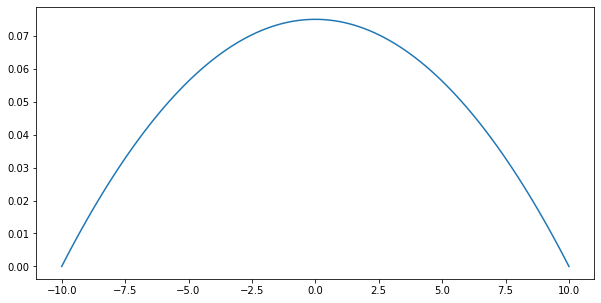

In [98]:
# Graph for F(x) and f(x)

# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Creating vectors X and f(x)
x = np.linspace(-10, 10, 100)
y = (3/4000)*(100-x**2)
 
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
 
# Show the plot
plt.show()

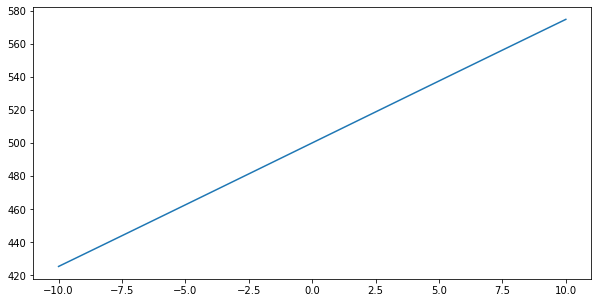

In [96]:
# Creating vectors X and F(x)
x = np.linspace(-10, 10, 100)
y = (1/4000)*(200-x)*(100+x)**2
 
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
 
# Show the plot
plt.show()

We need to solve the root finding problem : 
$$x = F^{-1}(u)$$
$$\implies F(x)-u = 0$$


# **1. Direct Computation of the root**

***(1) Write out in words how each algorithm will be run and derive all necessary formulae***

As per footnote link provided in the assignment, we use François Viète's formula for the roots of a cubic polynomial,
$$F(x) = \frac{1}{4R^3} (2R-x) (R+x)^2 = u$$
$$(2R-x)(R^2+2Rx+x^2)=4R^3u$$
$$x^3 - 3R^2x + (2R^3-4R^3u) = 0$$

For equation of the form $t^3 + pt + q = 0$


From the formula we have,
$$t_{k}=2\,{\sqrt {-{\frac {p}{3}}}}\,\cos \left[\,{\frac {1}{3}}\arccos \left({\frac {3q}{2p}}{\sqrt {\frac {-3}{p}}}\,\right)-{\frac {2\pi k}{3}}\,\right]\qquad {\text{for}}k=0,1,2 $$

and putting the above into the equation we have 

$$x_k = 2R\cdot cos[\frac{1}{3}cos^{-1}(2u-1)-\frac{2\pi k}{3}]\qquad \text{for}k = 0,1,2$$
where we have $U \sim  Uniform[0,1]$



In [92]:
# (2) implement these algorithms in a programming language of your choice and compare
# runtimes by generating a large number of random variates from each.

# importing the libraries
import math
import numpy as np

def direct_root(R,n,k):
  # function to figure out the roots of the equation 
  # inputs : value of R, total number of iterations n, root number k
  # output : n roots for different values of k

  u = np.random.uniform(size = n)
  roots = []
  for i in u:
    root = 2*R*math.cos((1/3)*math.acos(2*i-1)-((2*math.pi*k)/3)) 
    roots.append(root)
  return roots

In [93]:
direct_root(10,100,1)

[2.7635041609767197,
 -7.20422115984939,
 3.888658156460746,
 3.899009228097354,
 -0.9203611453491904,
 6.296691561083758,
 4.779384963729586,
 -3.047830514826957,
 3.051887951841568,
 6.075021929946912,
 6.082495103188331,
 0.7507966296477597,
 -1.162713610205802,
 -6.000215112591091,
 0.8923796081106634,
 -3.9420079617442423,
 -8.240878401037222,
 -1.1729379109190146,
 3.9566975563279967,
 2.758849631852343,
 -3.073413132166557,
 5.098568380478192,
 -4.045675698726915,
 -3.2669746867394167,
 -5.782859629944274,
 -5.125752595229742,
 -4.112270111292981,
 0.964302644804075,
 1.3065917143363859,
 -1.3760116027863936,
 3.387919509403683,
 -4.93673660273133,
 -8.68339837510382,
 -3.5673626203898543,
 -8.761133584633692,
 -1.4405518198237421,
 1.5569625224265704,
 -1.445781629083232,
 0.6520012705178202,
 2.569790041912418,
 -7.630330433430538,
 -5.224750842926115,
 -6.600839001267568,
 0.5046797599634313,
 -5.960547135834321,
 -9.180788125672864,
 -1.3731917583410298,
 3.195508828592076,


In [123]:
# Using time module to figure out the time taken 
# to execute the given function to find the root

import time
start_time = time.time()
direct_root(10,100,1)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0013151168823242188 seconds ---


**The given method fails in finding a reliable root for our purposes and hence fails to give us a solution that we need.**

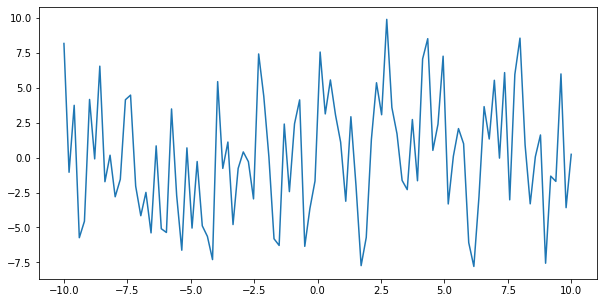

In [94]:
# Plotting the given values on a graph 

# Creating vectors X and Y
x = np.linspace(-10, 10, 100)
y = direct_root(10,100,1)
 
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
 
# Show the plot
plt.show()

# **2. The Newton Raphson Algorithm**

***(1) Write out in words how each algorithm will be run and derive all necessary formulae***

We start with a point $x_0$ in the domain of $F(x)$ and a tangent line will be drawn through the point $(x_0, F(x)-u)$. Letting $x_i$ be the root of this tangent line, then
$$f(x_0) = \frac{F(x_0) − u}{x_0 − x_1}$$ and solving for $x_1$ we have 
$$x_1 = x_0 - \frac{F(x_0) − u}{f(x_0)}$$

According to this question we have :
$$x_1 = x_0 - \frac{x^3 - 3R^2x + 2R^3 − 4R^3u}{3 R^2-3x_0^2}$$

and so on with replacing $x_0$ by $x_1$ every epoch

***ALGORITHM FOR NEWTON RAPHSON FOR GIVEN DISTRIBUTION***


```
# Input:
  F : D → R
  f : D → R
  x0 ∈ D
  τ ∈ R

# Algorithm:
  For i ≥ 1:
    xi = xi−1 − F(xi−1)/f(xi−1)
    
  if |xi − xi−1| < τ
  stop
  return xi
  Output:
  xi such that F(xi) ≈ 0
```
Now we know $F,f$ and we choose an arbitrary point for $x_0$ since $F$ is 
linear and some general terms for the rest

*Note : the runtime will differ based on the values of intial point chosen*

In [100]:
# (2) implement these algorithms in a programming language of your choice and compare
# runtimes by generating a large number of random variates from each.

# taking help from code shown in class 
# Newton Raphson Algorithm

def rootFind_nr(f_cdf, f_pdf, n, tol = 1e-4, max_it = 100, PrintPath = False):
    
    uu = np.random.uniform(size = n)
    
  
    x_0 = uu
    
    if PrintPath:
        print('U =', uu)
    
    for ii in range(1,max_it):
        x_1 = x_0 - ((f_cdf(x_0) - uu) / f_pdf(x_0))
        if PrintPath:
            print("{} {} {}".format(x_0,x_1, abs(x_1-x_0) < tol))
        
        if abs(x_1-x_0).all() < tol:
            break
        
        x_0 = x_1
    
    return x_1

In [101]:
rootFind_nr(F,f,120)

array([-6.35067733,  1.78498119, -4.07277412,  0.39727622,  2.89651391,
       -2.9624065 , -3.59678798, -2.49819044, -4.85481638,  4.01641404,
        1.00053679,  7.00289766, -4.91678381,  0.77422635,  6.39458517,
       -4.04024247,  0.74238007,  5.11097484, -1.96900969,  1.92860458,
       -8.62861437, -2.8465695 ,  0.65614137,  8.63598663,  2.48897841,
       -2.05820065,  2.63781591, -8.66220863,  4.6429541 ,  7.73699196,
       -2.28388186, -0.49636119, -4.26037181,  4.76268106, -6.07916805,
        7.80492325, -1.36444961, -4.64490416,  3.32074711,  1.00167193,
        3.70249575, -4.83712977, -3.56655823,  0.68183514,  6.73482164,
       -2.1653345 ,  2.10163042,  7.53933331, -4.40623164, -2.61358069,
        7.36779624, -0.42200599,  6.85844413,  2.57978917, -3.18024396,
       -1.97128269,  6.91024115, -4.49494401,  5.39245935,  4.50232822,
       -2.29789974, -5.13460703, -1.34779049,  1.14655767, -5.80422269,
        2.01107333, -7.09396915, -1.50018128,  3.61918599,  8.35

In [102]:
# Using time module to figure out the time taken 
# to execute the given function to find the root

import time
start_time = time.time()
rootFind_nr(F,f,100)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.00031113624572753906 seconds ---


In [103]:
# taking help from code in class
# Newton Raphson Algorithm with steps

def rootFind_nr_path(f_cdf, f_pdf,x_0, tol = 1e-4, max_it = 100):
    
    xx = [0 for x in range(0,100)]
    uu = np.random.uniform(size = 1)
    
    xx[0] = x_0
    
    for ii in range(1,max_it):
        xx[ii] = xx[ii - 1] - ((f_cdf(xx[ii - 1]) - uu) / f_pdf(xx[ii - 1]))
        
        if abs(xx[ii] - xx[ii-1]) < tol:
            break
            
    return xx

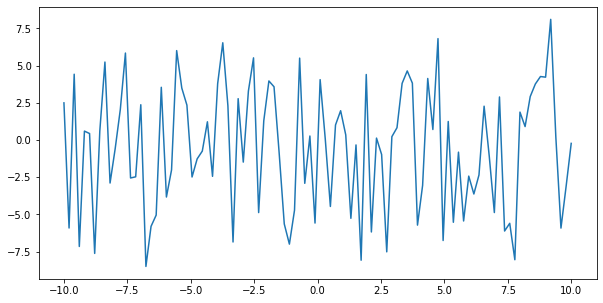

In [104]:
# Plotting values accrued from Newton Raphson algorithm

# Creating vectors X and Y
x = np.linspace(-10, 10, 100)
y = rootFind_nr(F,f,100)
 
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
 
# Show the plot
plt.show()

In [105]:
# 10 is a bad place to start
# rootFind_nr_path(F,f,10)

# **3. The Bisection Algorithm**

***(1) Write out in words how each algorithm will be run and derive all necessary formulae***



The bisection algorithm provides a gradient free root finding method which will be able to provide us with the root based on halving the selected intervals. It is a lot like Binary search algorithm and it is shown as follows :     

```
The Bisection Algorithm

Input:
  F : D → R, an function with a root to find
  a, b ∈ D such that F(a) < 0 < F(b), interval to search
  τ1, τ2 ∈ R
  +, thresholds for convergence

Algorithm:
  Set x0 = a and x1 = b
  For i ≥ 1
    Compute z = (x0 + x1)/2
    Compute F(z)
    if F(z) < 0
      Set x0 = z
    else if F(z) ≥ 0
      Set x1 = z
    if |x1 − x0| < τ1 or |F(z)| < τ2
      stop
  return z

Output:
  z such that F(z) ≈ 0

```

Now we know $F,a,b$  and we choose an arbitrary point for others.

*Note : the runtime will differ based on the values of intial point chosen*




In [ ]:
# (2) implement these algorithms in a programming language of your choice and compare
# runtimes by generating a large number of random variates from each.

# taking help from code shown in class and notes
# The Bisection Algorithm

def rootFind_bs(aa, bb, f_cdf, tol = 1e-4, max_it=100, PrintPath=False):

    uu = np.random.uniform(size = 1)

    if PrintPath:
        print("U =", uu)
    
    for ii in range(1, max_it):
        mid = (bb+aa)/2
        val = f_cdf(mid) - uu
        
        if val < 0:
            aa = mid
            
        else:
            bb = mid
        
        if PrintPath:
            print("{} {} {}".format(aa,bb,val))
        
        if abs(bb-aa) < tol or abs(val) < tol:
            break
    
    return mid



In [108]:
rootFind_bs( 0, 1, F, tol = 1e-4, max_it=100, PrintPath = True )

U = [0.08496004]
0 0.5 [0.45250871]
0 0.25 [0.43378605]
0 0.125 [0.42441447]
0 0.0625 [0.4197274]
0 0.03125 [0.4173837]
0 0.015625 [0.41621183]
0 0.0078125 [0.4156259]
0 0.00390625 [0.41533293]
0 0.001953125 [0.41518644]
0 0.0009765625 [0.4151132]
0 0.00048828125 [0.41507658]
0 0.000244140625 [0.41505827]
0 0.0001220703125 [0.41504911]
0 6.103515625e-05 [0.41504454]


6.103515625e-05

In [109]:
import time
start_time = time.time()
rootFind_bs( 0, 1, F, tol = 1e-4, max_it=100, PrintPath = True )
print("--- %s seconds ---" % (time.time() - start_time))

U = [0.46866502]
0 0.5 [0.06880373]
0 0.25 [0.05008107]
0 0.125 [0.04070949]
0 0.0625 [0.03602242]
0 0.03125 [0.03367872]
0 0.015625 [0.03250685]
0 0.0078125 [0.03192091]
0 0.00390625 [0.03162795]
0 0.001953125 [0.03148146]
0 0.0009765625 [0.03140822]
0 0.00048828125 [0.0313716]
0 0.000244140625 [0.03135329]
0 0.0001220703125 [0.03134413]
0 6.103515625e-05 [0.03133955]
--- 0.0023958683013916016 seconds ---


**We can therefore conclude after looking at runtimes that the Newton Raphson method is the fastest method of root finding**

# **Q2. ACCEPTANCE-REJECTION**

In part 2 of this assignment, the goal is to set up and compare the acceptance-rejection algorithm
by sampling from different beta distributions:
1. Beta $(1, 1)$, the uniform distribution
2. Beta $(1/2, 1/2)$, the arcsin distribution
3. Beta $(3/2, 3/2)$, Wigner’s semi-circle distribution after shifting and scaling.


Using Theorem 1.3.1, 
$$f(x) = cg(x)h(x)$$ 

and the pseudocode is as follows -


```
The Acceptance-Rejection Algorithm

Input:
  g(x) ∈ [0, 1]
  h(x), a pdf to sample from

Algorithm:
  Repeat
    Generate z from pdf h(z)
    Generate u from Uniform [0, 1]
    if u ≤ g(z)
      stop
  return x = z
  
Output:
  x from pdf f(x) = cg(x)h(x).

```


1.We see that here $g(x)$ is the Beta $(1, 1)$, the uniform distribution and so $g(x) = 1$ where $0 \leq x \leq 1$ and $h(x) = f(x)$ 

and using algorithm 3 we can derive the following :

In [110]:
# We define our own version of the acceptance rejection algorithm 
# Inputs and output as defined above
# Warning : considerable errors present themselves due to less than suitable 
# function defined 

def acceptance_rejection(g,h):
  for i in range(1000):
    M = h(i)
    u = np.random.uniform(size = 1)
    if u <= g(M):
      return M

In [111]:
def g_1(x):
  return 1

In [112]:
acceptance_rejection(g_1,f)

0.075

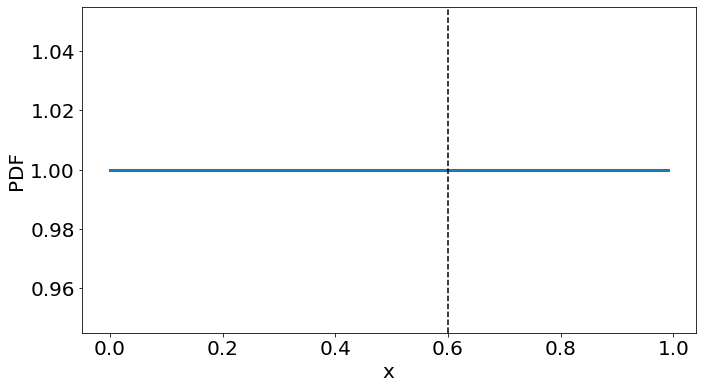

In [113]:
# Plotting the above beta distribution (which is uniform at 1)

# Import packages
from scipy.stats import beta as beta_dist
import matplotlib.pyplot as plt
import numpy as np

# Plot the distribution
alpha = 1
beta = 1
x = np.arange (0, 1, 0.01)
y = beta_dist.pdf(x, alpha, beta)
plt.figure(figsize=(11,6))
plt.plot(x, y, linewidth=3)
plt.xlabel('x', fontsize=20)
plt.ylabel('PDF', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axvline(0.6,  linestyle = 'dashed', color='black')
plt.show()

2. We see that here $g(x) = \frac{2}{\pi \cdot \sqrt{x \cdot (1-x)}}$ for $0 \leq x \leq 1$ and $h(x) = (3 π \sqrt{((1 - x) x)} (R^2 - x^2))/(8 R^3)$ such that $h(x) > 0 \forall x \in (0,1) $ 

In [114]:
def g_2(x):
  return 2/(math.pi*math.sqrt((x/100)*((1-x)/100)))

def h_2(x):
  return (3*math.pi*math.sqrt((x/1001)*((1-x)/1001)*(100-x**2)))/(8000)

In [116]:
# acceptance_rejection(g_2,h_2)

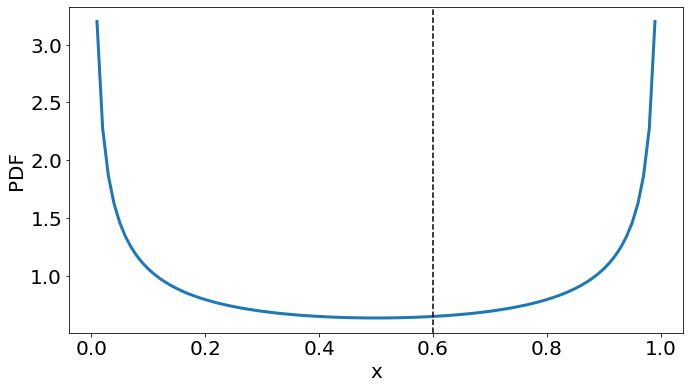

In [117]:
# Plotting the above beta distribution (alpha = beta = 1/2)

# Plot the distribution
alpha = 1/2
beta = 1/2
x = np.arange (0, 1, 0.01)
y = beta_dist.pdf(x, alpha, beta)
plt.figure(figsize=(11,6))
plt.plot(x, y, linewidth=3)
plt.xlabel('x', fontsize=20)
plt.ylabel('PDF', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axvline(0.6,  linestyle = 'dashed', color='black')
plt.show()

3. We see that here $g(x) =\sqrt{x-x^2}$ and $h(x) = \frac{R^2-x^2}{\sqrt{x^2-x}}$ such that $h(x) > 0 \forall x \in (0,1)$

In [118]:
def g_3(x):
  return math.sqrt(x-x**2)

def h_3(x):
  return (100-x**2)/math.sqrt(x**2-x)

In [120]:
# acceptance_rejection(g_3,h_3)

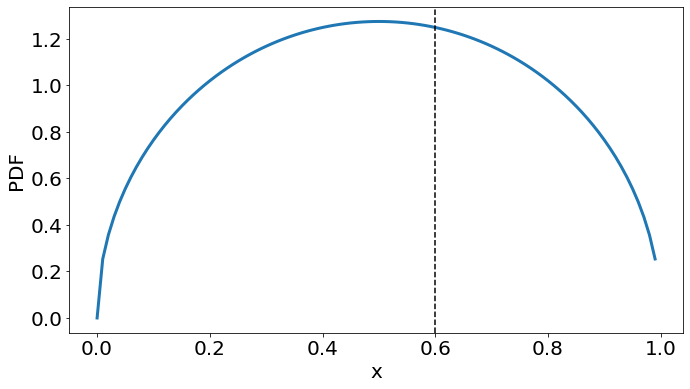

In [121]:
# Plotting the above beta distribution (alpha = beta = 3/2)

# Plot the distribution
alpha = 3/2
beta = 3/2
x = np.arange (0, 1, 0.01)
y = beta_dist.pdf(x, alpha, beta)
plt.figure(figsize=(11,6))
plt.plot(x, y, linewidth=3)
plt.xlabel('x', fontsize=20)
plt.ylabel('PDF', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axvline(0.6,  linestyle = 'dashed', color='black')
plt.show()

Intuitively speaking, $Beta(\frac{3}{2},\frac{3}{2})$ is the most efficient algorithm when it comes to estimating the original function $f(x)$ since it encompasses the graph as well and has the best result from the rejection sampling algorithm. 